First 5 rows of the dataset:
   visual_score  auditory_score  kinesthetic_score learning_style
0      8.000301        1.389837           9.686887         visual
1      8.401052        7.294055           4.853655         visual
2      9.124874        3.975049           6.688173       auditory
3      5.724100        7.702631           7.535001       auditory
4      5.060739        4.711628           4.302653    kinesthetic

Checking for missing values:
visual_score         0
auditory_score       0
kinesthetic_score    0
learning_style       0
dtype: int64

Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.57      0.62         7
           1       0.00      0.00      0.00         4
           2       0.50      0.67      0.57         9

    accuracy                           0.50        20
   macro avg       0.39      0.41      0.40        20
weighted avg       0.46      0.50      0.47        20

Accuracy Score: 0.5


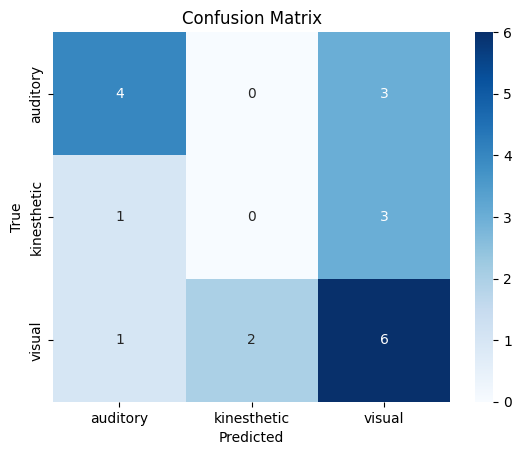

In [19]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Machine learning libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# Load the dataset
df = pd.read_csv('/content/student_methods.csv')  # Adjust the path if needed

# Display the first few rows
print("First 5 rows of the dataset:")
print(df.head())

# Check for missing values
print("\nChecking for missing values:")
print(df.isnull().sum())

# Encode the target variable (learning_style)
le = LabelEncoder()
df['learning_style_encoded'] = le.fit_transform(df['learning_style'])

# Define features and target
X = df[['visual_score', 'auditory_score', 'kinesthetic_score']]
y = df['learning_style_encoded']

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Random Forest Classifier
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("Accuracy Score:", accuracy_score(y_test, y_pred))

# Plot Confusion Matrix
conf_mat = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues',
            xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()
